In [1]:
# import library and load dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler

# load dataset
data_path = '../data/raw/data.csv' 
data = pd.read_csv(data_path, delimiter=';')


In [2]:
# Initial Data Inspection
print("Initial Data Overview:")
print(data.info())
print("Sample Data:\n", data.head())
print("Missing values per column:\n", data.isnull().sum())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualifica

In [3]:
# Encode Target Variable
# Encoding the target variable where 'Dropout' -> 0, 'Enrolled' and 'Graduate' -> 1
data['Target'] = data['Target'].map({'Dropout': 1, 'Enrolled': 0, 'Graduate': 0})

# Rename 'Nacionality' to 'Nationality'
data.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

# Drop Gender column to avoid potential discrimination
data.drop(columns=['Gender'], inplace=True)

data.rename(columns={'Daytime/evening attendance	': 'Daytime/evening attendance'}, inplace=True)


In [4]:
# Count the number of students for each nationality
nationality_counts = data['Nationality'].value_counts().sort_index()

# Display the counts
print("Number of students per nationality:")
print(nationality_counts)

# print International students count
print("International", data['International'].value_counts())

Number of students per nationality:
Nationality
1      4314
2         2
6        13
11        3
13        1
14        1
17        1
21        2
22       13
24        5
25        2
26       14
32        1
41       38
62        2
100       3
101       2
103       3
105       2
108       1
109       1
Name: count, dtype: int64
International International
0    4314
1     110
Name: count, dtype: int64


In [5]:
# Drop the Nationality column as it is redundant with the internationaly feature
data = data.drop(columns=['Nationality'])

In [6]:
# Save Cleaned Data for EDA
# Save this unscaled version for EDA
eda_output_path = '../data/processed/data_for_eda.csv'
data.to_csv(eda_output_path, index=False)
print(f"Unscaled cleaned dataset saved for EDA to {eda_output_path}")

Unscaled cleaned dataset saved for EDA to ../data/processed/data_for_eda.csv


In [7]:
# Separate categorical and numerical columns
numerical_cols = ['Admission grade', 
                  'Unemployment rate', 
                  'Inflation rate', 
                  'GDP', 
                  'Application order',
                  'Age at enrollment',
                  'Previous qualification (grade)', 
                  'Curricular units 1st sem (credited)', 
                  'Curricular units 1st sem (enrolled)', 
                  'Curricular units 1st sem (evaluations)', 
                  'Curricular units 1st sem (approved)', 
                  'Curricular units 1st sem (grade)', 
                  'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)', 
                  'Curricular units 2nd sem (enrolled)', 
                  'Curricular units 2nd sem (evaluations)', 
                  'Curricular units 2nd sem (approved)', 
                  'Curricular units 2nd sem (grade)', 
                  'Curricular units 2nd sem (without evaluations)']  
categorical_cols = [col for col in data.columns if col not in numerical_cols]

# Normalize Numerical Features
print("Data columns:", len(data.columns))
print("Numerical columns:", len(numerical_cols))
print("Categorical columns (including Target):", len(categorical_cols))

print("categorical_cols:", categorical_cols)

# Normalize numerical columns only
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Save the fully processed, normalized dataset for modeling
model_output_path = '../data/processed/data_cleaned_scaled.csv'
data.to_csv(model_output_path, index=False)
print(f"Fully processed and scaled dataset saved for modeling to {model_output_path}")

Data columns: 35
Numerical columns: 19
Categorical columns (including Target): 16
categorical_cols: ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International', 'Target']
Fully processed and scaled dataset saved for modeling to ../data/processed/data_cleaned_scaled.csv


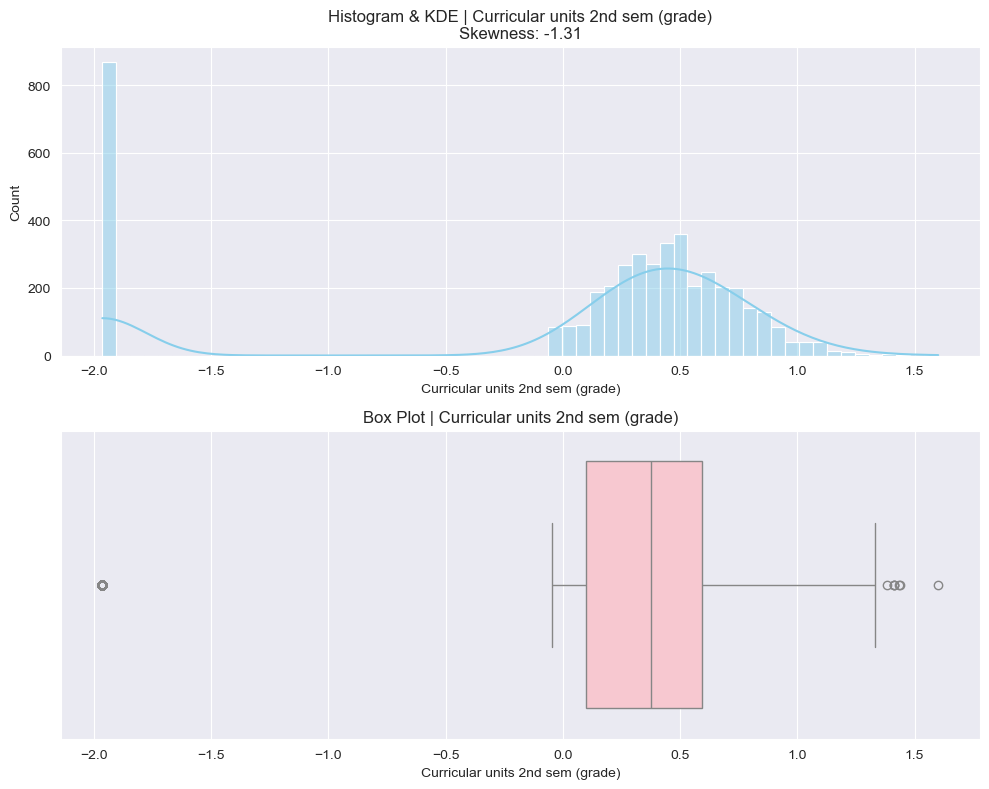

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'selected_feature' with the name of the numerical feature you want to analyze
selected_feature = 'Curricular units 2nd sem (grade)'

sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))

# Histogram with KDE
plt.subplot(2, 1, 1)
sns.histplot(data[selected_feature], kde=True, color="skyblue")
plt.title(f"Histogram & KDE | {selected_feature}\nSkewness: {round(data[selected_feature].skew(), 2)}")
plt.xlabel(selected_feature)

# Box Plot
plt.subplot(2, 1, 2)
sns.boxplot(x=data[selected_feature], color="pink")
plt.title(f"Box Plot | {selected_feature}")
plt.xlabel(selected_feature)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [9]:
# one-hot encode the categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
# rename Target_1 to Target
data.rename(columns={'Target_1': 'Target'}, inplace=True)
data = data * 1
# How many Target is 1 and 0
print("Target:", data['Target'].value_counts())
print("Data columns:", len(data.columns))
model_output_path = '../data/processed/data_cleaned_scaled_onehot.csv'
data.to_csv(model_output_path, index=False)
print(f"Fully processed, scaled, and encoded dataset saved for modeling to {model_output_path}")

Target: Target
0    3003
1    1421
Name: count, dtype: int64
Data columns: 218
Fully processed, scaled, and encoded dataset saved for modeling to ../data/processed/data_cleaned_scaled_onehot.csv
